In [1]:
print('Welcome to RandomForest classifier')

Welcome to RandomForest classifier


In [87]:
import numpy as np
import pandas as pd
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [88]:
data = pd.read_csv("./data/pima-indians-diabetes.csv")

In [89]:
data.shape

(768, 9)

In [90]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [93]:
feature_names =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
target=["Outcome"]

In [94]:
X = data[feature_names]
y = data[target]

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_15348\7989054.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Outcome", palette="Set2", legend=True)


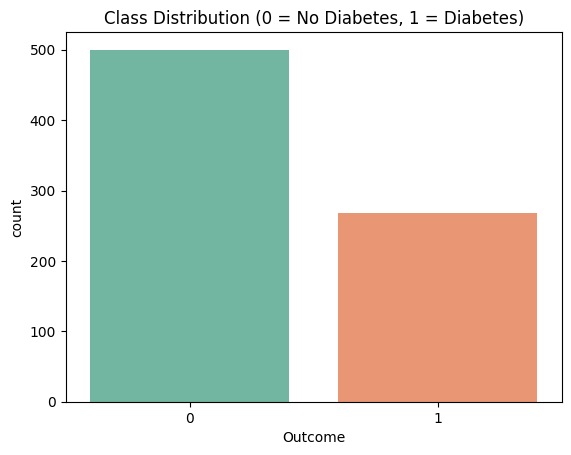

In [97]:
sns.countplot(data=data, x="Outcome", palette="Set2", legend=True)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15348\3009742670.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Outcome", y="Glucose", palette="Set2")


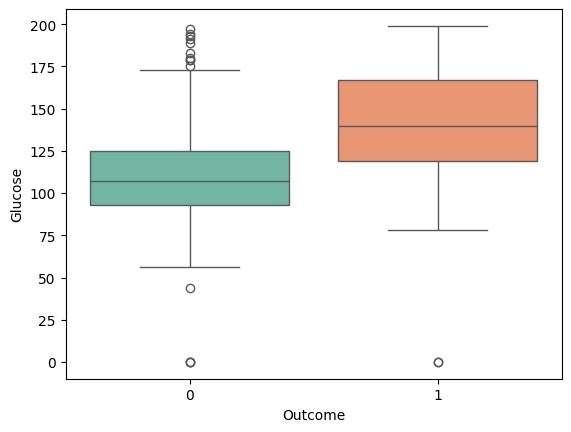

In [98]:
sns.boxplot(data=data, x="Outcome", y="Glucose", palette="Set2")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15348\3546399091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Outcome", y ="BMI", palette="Set3")


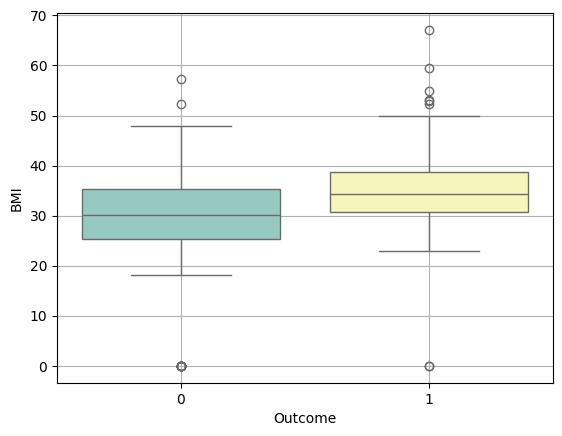

In [99]:
sns.boxplot(data=data, x="Outcome", y ="BMI", palette="Set3")
plt.grid()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15348\3800197628.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Outcome", y ="Pregnancies", palette="Set3")


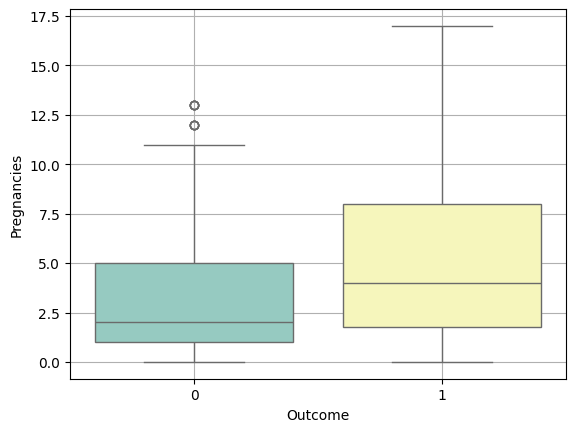

In [100]:
sns.boxplot(data=data, x="Outcome", y ="Pregnancies", palette="Set3")
plt.grid()
plt.show()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [103]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
318,3,115,66,39,140,38.1,0.150,28
313,3,113,50,10,85,29.5,0.626,25
195,5,158,84,41,210,39.4,0.395,29
570,3,78,70,0,0,32.5,0.270,39
226,0,101,76,0,0,35.7,0.198,26


In [104]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)

In [106]:
X_test_scaled = scaler.transform(X_test)

In [166]:
model = RandomForestClassifier(criterion="entropy", max_depth=7, min_samples_split=3, n_estimators=1000)

In [167]:
model.fit(X_train_scaled, y_train)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,1000
,criterion,'entropy'
,max_depth,7
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [168]:
y_pred = model.predict(X_test_scaled)

In [169]:
print(f"Accuracy score {accuracy_score(y_test, y_pred)}")

Accuracy score 0.8116883116883117


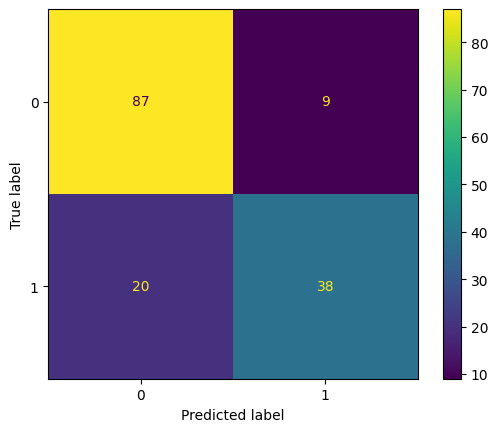

In [171]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()